
#A Machine Learning Algorithm to Predict Late Ecommerce Deliveries
```
by D.A.Anderson 2022
```

---

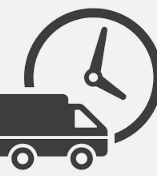

###This notebook trains an A.I. model to predict late e-commerce deliveries. 

Data source is Olist's Public E-Commerce Dataset. https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce. You will need to create the notebook's datasets using [this code](https://colab.research.google.com/drive/1rqjjTAJ22hJBbPAdDUkwuZ1XMUUNzfbq?usp=sharing) and then move them to your main Google Drive folder. Due to usage limits in Colab we analyse only ~10K orders from the Olist dataset's ~100K orders. 

 





The **[target variable](https://www.datarobot.com/wiki/target/)** predicted here is QUANTILE, the delta of *estimated deliver date to customer*  minus  *actual deliver date to customer*, collapsed as 13 rankings from 1 'very early' to 13 'very late'. 

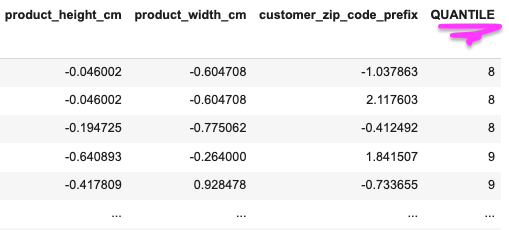

The **[predictor variables](https://www.dtreg.com/solution/classes-and-types-of-variables)** from Olist data are: 



```
seller_id, shipping_limit_date, price,
freight_value, seller_zip_code_prefix,
order_purchase_timestamp, order_approved_at,
payment_sequential, payment_type,
payment_installments, payment_value,
product_name_lenght, product_description_lenght,
product_photos_qty, product_weight_g,
product_length_cm, product_height_cm,
product_width_cm, customer_zip_code_prefix
```

This notebook runs on [Colab's Cloud TPUs](https://cloud.google.com/tpu), please ensure TPU is selected as your runtime accellarator. It can easily be reconfigured for CPUs by removing the resolver and strategy scope code below. 

#Import python libraries

In [ ]:
import json
import os
import pandas as pd
import pprint
import tensorflow as tf 
import time
import numpy as np
from tensorflow import keras
import distutils
import gc

#Create Keras dataset

In [ ]:
def load_data(y_name='QUANTILE'):

  train=pd.read_csv('/content/drive/MyDrive/TRAINSAMP.csv').drop(columns=['order_purchase_timestamp']).astype('int32')
  test = pd.read_csv('/content/drive/MyDrive/TESTSAMP.csv').drop(columns=['order_purchase_timestamp']).astype('int32')
  val = pd.read_csv('/content/drive/MyDrive/VALSAMP.csv').drop(columns=['order_purchase_timestamp']).astype('int32')
  train_x, train_y = train, train.pop(y_name)
  test_x, test_y = test, test.pop(y_name)
  val_x, val_y = val, val.pop(y_name)

  return (train_x, train_y), (test_x, test_y), (val_x, val_y)

# Build, resolve, compile model

*See the Colab Iris classification notebook: https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/classification_iris_data_with_keras.ipynb#scrollTo=OyFLGbBcLT8e*




In [ ]:
#BUILD

def get_model():
  return keras.Sequential([
    keras.layers.Dense(100, input_shape=(11230,)),

    keras.layers.Dense(88),
    keras.layers.Dense(44),

    keras.layers.Dense(14, activation=None),
    keras.layers.Dense(14, activation=tf.nn.softmax)
  ])

#TPU RESOLVE

tpu_address = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR']) 
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

#COMPILE

with strategy.scope():
  model = get_model()
  model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

model.summary()


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.95.95.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.95.95.34:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1123100   
                                                                 
 dense_1 (Dense)             (None, 88)                8888      
                                                                 
 dense_2 (Dense)             (None, 44)                3916      
                                                                 
 dense_3 (Dense)             (None, 14)                630       
                                                                 
 dense_4 (Dense)             (None, 14)                210       
                                                                 
Total params: 1,136,744
Trainable params: 1,136,744
Non-trainable params: 0
_________________________________________________________________


# Load and train model

### - LOAD DATA


In [ ]:
(train_x, train_y), (test_x, test_y), (val_x, val_y) = load_data()

### TRAIN MODEL



```
Use TEST or VAL data as validation_data below. VAL is used below.
```





Create a callback to stop training when learning plateaus:


In [ ]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

Train the model.

In [ ]:
history=model.fit(train_x.values, train_y.values,steps_per_epoch = 1, epochs=200  ,validation_data=(val_x.values, val_y.values),validation_batch_size=100, callbacks=[callback])

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 2.6209 - accuracy: 0.1551 - val_loss: 2.6582 - val_accuracy: 0.0508
Epoch 2/200
1/1 [==============================] - 1s 927ms/step - loss: 2.6051 - accuracy: 0.2356 - val_loss: 2.6470 - val_accuracy: 0.0805
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 2.5909 - accuracy: 0.3095 - val_loss: 2.6369 - val_accuracy: 0.1191
Epoch 4/200
1/1 [==============================] - 1s 935ms/step - loss: 2.5776 - accuracy: 0.3863 - val_loss: 2.6274 - val_accuracy: 0.1547
Epoch 5/200
1/1 [==============================] - 1s 926ms/step - loss: 2.5651 - accuracy: 0.4545 - val_loss: 2.6184 - val_accuracy: 0.1834
Epoch 6/200
1/1 [==============================] - 1s 942ms/step - loss: 2.5531 - accuracy: 0.5239 - val_loss: 2.6100 - val_accuracy: 0.2204
Epoch 7/200
1/1 [==============================] - 1s 953ms/step - loss: 2.5417 - accuracy: 0.5846 - val_loss: 2.6018 - val_accuracy: 0.2455
Epoch 8/200
1/1 [==

# Plot training

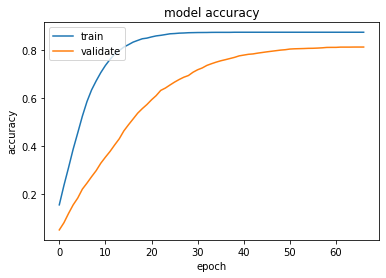

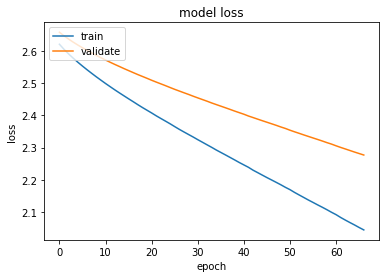

In [ ]:
# see https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


#Data & code resources

Data Source
*https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce*

Iris classification on Cloud TPU notebook

*https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/classification_iris_data_with_keras.ipynb#scrollTo=OyFLGbBcLT8e*